<h1 style="color:purple; background:yellow; line-height:2; text-align:center">📊 START-UP ACQUISITION STATUS PREDICTION 📊</h1>
<h4 style="color:red; text-align:right">By: Mr. Suraj Honkamble</h4>

<h2 style="color:blue; background:lightblue;line-height:2; text-align:center;">Table of Content: 🎡🎡</h2>
<h3 style="color:magenta; line-height:1.7;">1. Objective of the Project<br>
    2. Data info<br>
    3. Loading the packages or libraries<br>
    4. Loading the dataset<br>
    5. Understandng our data<br>
    6. Data Cleaning<br>
    &nbsp;&nbsp;&nbsp;&nbsp; i. Delete irrelevant & redundant information<br>
    &nbsp;&nbsp;&nbsp;&nbsp; ii. Remove noise or unreliable data (duplicate, missing values and outliers).<br>
    &nbsp;&nbsp;&nbsp;&nbsp; iii. Data Transformation<br>
    &nbsp;&nbsp;&nbsp;&nbsp; iv. Feature Creation<br>
    7. Exploratory Data Analysis<br>
    &nbsp;&nbsp;&nbsp;&nbsp; i. Univariate Analysis<br>
    &nbsp;&nbsp;&nbsp;&nbsp; ii. Bivariate Analysis<br>
    &nbsp;&nbsp;&nbsp;&nbsp; iii. Multivariate Analysis<br>
    8. Feature Engineering<br>
    &nbsp;&nbsp;&nbsp;&nbsp; i. Feature Selection Techniques<br>
    &nbsp;&nbsp;&nbsp;&nbsp; ii. Feature Reduction Techniques<br>
    9. ML Model Building<br>
    </h3>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Objective of the Project: 🎯🎯</h2>
<h3 style="color:green; line-height:1.2;"> The objective of the project is to predict whether a startup which is currently Operating, IPO, Acquired, or closed.This problem will be solved through a Supervised Machine Learning approach by training a model based on the history of startups which were either acquired or closed.</h3>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Data Info: 📰📰</h2>
<h3 style="color:green; line-height:1.5;">There are 196562 rows and 44 columns out of which will be used as features. The rest provide more information about the data, but will not be used for model training (like normalized name, entity id, short description etc.)<br><br>
    <b style="color:red"> 1. entity_type : </b> Type of company.<br>
    <b style="color:red"> 2. entity_id : </b> Unique Id for each entity.<br>
    <b style="color:red"> 3. name : </b> Name of the entity or company.<br>
    <b style="color:red"> 4. category_code : </b> Type of company.<br>
    <b style="color:red"> 5. status : </b> Status of the company, whether it is operating or not and this is our target variable.<br>
    <b style="color:red"> 6. founded_at : </b> Company foundation yera.<br>
    <b style="color:red"> 7. closed_at : </b> Company shut-down year.<br>
    <b style="color:red"> 8. country_code, state_code, city, region : </b> Country, State, City and region which the company located at.<br>
    <b style="color:red"> 9. first_investment_at, last_investment_at : </b> First and Last Investment Dates.<br>
    <b style="color:red"> 10. investment_rounds : </b> Count of Investment rounds take place.<br>
    <b style="color:red"> 11. invested_companies : </b> Count of companies who are invested in this company.<br>
    <b style="color:red"> 12. first_funding_at, last_funding_at : </b> First and Last funding date.<br>
    <b style="color:red"> 13. funding_rounds : </b> Count of funding rounds.<br>
    <b style="color:red"> 14. funding_total_usd : </b> Amount of total funding in US Dollar.<br>
    <b style="color:red"> 15. first_milestone_at, last_milestone_at : </b> Date on which company achieved their first and last targeted milestone.<br>
    <b style="color:red"> 16. milestones : </b> Number of milestones achieved by each company.<br>
    <b style="color:red"> 17. relationships : </b> Number of relations company has with various stackholders.<br>
    <b style="color:red"> 18. created_by : </b> Company Creator name.<br>
    <b style="color:red"> 19. created_at, updated_at : </b> Company Created and Updated dates.<br>
    <b style="color:red"> 20. lat, lng : </b> Latitude and Longitude of the company location.<br>
    <b style="color:red"> 21. ROI : </b> Return of Investment.<br>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Import required libraries 📕📗</h2>

In [9]:
# Data loading and manipulating libraries
import pandas as pd
import numpy as np

# Set column visibility to 50, because our dataset contains 44 column
pd.set_option('display.max_columns', 50)

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Avoiding uncessary warnings
import warnings
warnings.filterwarnings('ignore')

# Train Test Split
from sklearn.model_selection import train_test_split

# Feature Engineering-Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Feature Selection and Feature Reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Oversampling the lower target class
from imblearn.over_sampling import SMOTE

# Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix


# Classification Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center">Loading the dataset 📂📂</h2>

In [ ]:
df=pd.read_csv('Data/companies.csv')
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center">Understanding Our Data 👁📰

In [ ]:
df.shape

(196553, 44)

In [ ]:
df.size

8648332

In [ ]:
df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

### Descriptive statistics

In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,196553.0,98276.00,56740.11,0.00,49138.00,98276.00,147414.00,1.965520e+05
entity_id,196553.0,153006.23,90209.25,1.00,59850.00,174539.00,232655.00,2.862150e+05
parent_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
logo_width,110110.0,459.13,594.98,1.00,192.00,267.00,484.00,1.820000e+04
logo_height,110110.0,222.73,333.09,1.00,70.00,105.00,232.00,9.600000e+03
investment_rounds,2591.0,2.37,12.17,1.00,1.00,1.00,1.00,4.780000e+02
invested_companies,2591.0,2.20,11.44,1.00,1.00,1.00,1.00,4.590000e+02
funding_rounds,31707.0,1.66,1.20,1.00,1.00,1.00,2.00,1.500000e+01
funding_total_usd,27874.0,14816520.42,67759366.56,291.00,500000.00,2564500.00,11000000.00,5.700000e+09
milestones,91699.0,1.20,0.54,1.00,1.00,1.00,1.00,9.000000e+00


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
id,196553,196553,c:1,1
entity_type,196553,1,Company,196553
name,196531,196348,L,8
normalized_name,196527,195451,l,9
permalink,196553,196512,/company/bboescape,3
category_code,123186,42,software,17922
status,196553,4,operating,183441
founded_at,91227,6156,2011-01-01,3748
closed_at,2620,925,2012-01-01,176
domain,126545,125498,placeshilton.com,44


### Duplicate Values

In [ ]:
df.duplicated().sum()

0

### Missing value

In [ ]:
print("Count of Missing values in each column\n", df.isna().sum())
print("\n")
print("Percentage of Missing values in each column\n",round(df.isna().sum()/df.shape[0]*100, 2))

Count of Missing values in each column
 id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046


<h2 style="color:red;">Basic Observations: 🕵️‍♀️🕵️‍♀️</h2>
<h4 style="color:coral; line-height:2">1. Data set contains 1,96,553 rows and 44 columns.<br>
    2. All date related columns are of object data type. We need to convert it to date type.<br>
    3. Many columns in our dataset are not going to contribute in predicting the status of the company.<br>
    4. Data set contains no duplicate rows.<br>
    5. parent_id column in our dataset has 100% null values. Surely we are going to drop this.<br>
    6. "Status" column is our target variable and it is free of null values.<br>
    7. The variable "investment_rounds" has a mean of 2.37 with a wide standard deviation of 12.17, indicating significant variability in the number of investment rounds.<br>
    8. The "funding_total_usd" variable has a mean of 1,48,16,520.42 and a large standard deviation of 6,77,59,366.56. This wide spread suggests a significant disparity in the funding amounts received by different entities, with some potentially securing very high amounts.<br>
    9. The mean latitude is 37.56, and the mean longitude is -52.12. These values indicate a general location for most companies.<br>
    10. The "ROI" variable has a mean of 45.75 and a large standard deviation of 572.04. This suggests that while the average ROI is positive, there is considerable variability, with some entities potentially achieving very high returns<br>
    11. The "milestones" and "relationships" variables have relatively low Means, this means, on average entities have a small number of milestones and relationships. However, the wide standard deviations indicate variability in these aspects among different entities.<br>
    12. The "id" column has 1,96,553 unique values, suggesting each entry has a distinct identifier.<br>
    13. All entities in the dataset belong to a single entity type "Company".<br>
    14. The "name" column has 1,96,530 entries, with 1,96,347 unique names. The most frequent name is "L" with a frequency of 8. This also suggest that we have duplicates rows.
    15. The "category_code" column has 1,23,186 unique entries, with the most frequent category being "software" with a frequency of 17,922.<br>
    16. The "status" column has 1,96,553 entries, with the most frequent status being "operating" with a frequency of 183,441.<br>
    17. The "closed_at" column has 2,620 unique entries, with the most common closing date being "2012-01-01" with a frequency of 176.<br>
    18. Various columns like "first_investment_at," "last_investment_at," "first_funding_at," "last_funding_at," "first_milestone_at," and "last_milestone_at" contain date information indicating the timeframes of different activities.<br>
    19. "USA" is the most common country code (51,637 times). For states, "CA" (California) leads with 16,489 occurrences out of 50,903. In cities, "New York" is the most frequent, appearing 3,816 times out of 83,890.<br>
    20. The "created_by" column has 155,533 unique entries, with the most frequent creator being "dhawalarco" with a frequency of 10,005.</h4>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Data Cleaning 🔎🔧</h2>

<h2 style="color:red; line-height:1.5">1. Delete irrelevant & redundant information<br>
    2. Remove noise or unreliable data (duplicate, missing values and outliers).</h2>

<h3 style="color:red;">1. Delete irrelevant & redundant information</h3>
<h4 style="color:blue; line-height:1.7">a. Delete 'region','city','state_code' as they provide too much of granularity.<br>
    b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.<br>
    c. Delete 'name', domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink' as they are irrelevant features.</h4>

In [ ]:
unwanted_col=['name', 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'region','city','state_code',
              'created_by', 'created_at', 'updated_at', 'normalized_name', 'permalink', 'domain','homepage_url',
              'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description',
              'overview', 'tag_list']

df.drop(unwanted_col, axis=1, inplace=True)
df.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng',
       'ROI'],
      dtype='object')

<h3 style="color:red; line-height:1.5">2. Remove noise or unreliable data (duplicate entries, missing values and outliers).</h3>

<h3 style="color:blue;">2.1. Handling Duplicate Values</h3>

In [ ]:
df.duplicated().sum()

87089

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(109464, 20)

<h3 style="color:blue;">2.2. Missing Value Treatment</h3>

In [ ]:
round(df.isna().sum()/df.shape[0]*100, 2)

category_code          11.17
status                  0.00
founded_at             24.59
closed_at              97.61
country_code           22.72
first_investment_at    97.95
last_investment_at     97.95
investment_rounds      97.94
invested_companies     97.94
first_funding_at       71.25
last_funding_at        71.25
funding_rounds         71.07
funding_total_usd      74.55
first_milestone_at     48.74
last_milestone_at      48.74
milestones             48.74
relationships          31.43
lat                    25.91
lng                    25.91
ROI                    99.34
dtype: float64

<h3 style="color:blue;">2.2.1. Drop the columns which contains more than 97% of null rows.</h3>

In [ ]:
drop_cols=['ROI','first_investment_at','last_investment_at','investment_rounds','invested_companies']
df.drop(columns=drop_cols, inplace=True)
round(df.isna().sum()/df.shape[0]*100, 2)

category_code         11.17
status                 0.00
founded_at            24.59
closed_at             97.61
country_code          22.72
first_funding_at      71.25
last_funding_at       71.25
funding_rounds        71.07
funding_total_usd     74.55
first_milestone_at    48.74
last_milestone_at     48.74
milestones            48.74
relationships         31.43
lat                   25.91
lng                   25.91
dtype: float64

In [ ]:
df.shape

(109464, 15)

<h3 style="color:blue;">2.2.2. Delete instances with missing values for 'country_code', 'category_code', 'founded_at' 'first_funding_at', 'first_milestone_at', 'relationships' and 'lat'.</h3>
<h4> (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [ ]:
df.dropna(subset=['country_code','category_code','founded_at','first_funding_at',
                  'first_milestone_at', 'relationships', 'lat'], axis=0, inplace=True)
round(df.isna().sum()/df.shape[0]*100, 2)

category_code          0.00
status                 0.00
founded_at             0.00
closed_at             94.64
country_code           0.00
first_funding_at       0.00
last_funding_at        0.00
funding_rounds         0.00
funding_total_usd     10.13
first_milestone_at     0.00
last_milestone_at      0.00
milestones             0.00
relationships          0.00
lat                    0.00
lng                    0.00
dtype: float64

In [ ]:
df.shape

(13716, 15)

<h3 style="color:blue;">2.2.3. Fill the missing values in numerical columns, 'funding_total_usd' by median.</h3>

- The median is less sensitive to extreme values compared to the mean. Imputing missing values with the median can be a good choice for right-skewed data as it is robust to outliers.

In [ ]:
median=df['funding_total_usd'].median()
df['funding_total_usd'].fillna(median, inplace=True)
round(df.isna().sum()/df.shape[0]*100, 2)

category_code          0.00
status                 0.00
founded_at             0.00
closed_at             94.64
country_code           0.00
first_funding_at       0.00
last_funding_at        0.00
funding_rounds         0.00
funding_total_usd      0.00
first_milestone_at     0.00
last_milestone_at      0.00
milestones             0.00
relationships          0.00
lat                    0.00
lng                    0.00
dtype: float64

<h2 style="color:blue;">Data Trasformation</h2>

<h3 style="color:red">1. Data Type Conversion</h3>

In [ ]:
df.dtypes

category_code          object
status                 object
founded_at             object
closed_at              object
country_code           object
first_funding_at       object
last_funding_at        object
funding_rounds        float64
funding_total_usd     float64
first_milestone_at     object
last_milestone_at      object
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

<h3 style="color:blue;">1.1. Convert data type of "relationships", "funding_rounds", "milestones" from float to integer.</h3>

In [ ]:
df['funding_rounds']=df['funding_rounds'].astype(int)
df['milestones']=df['milestones'].astype(int)
df['relationships']=df['relationships'].astype(int)

df[['funding_rounds','milestones','relationships']].dtypes

funding_rounds    int32
milestones        int32
relationships     int32
dtype: object

<h3 style="color:blue;">1.2. Convert data type of Date column from object to datetime and the extract only year.</h3>

In [ ]:
df['founded_at']=pd.to_datetime(df['founded_at']).dt.year
df['closed_at']=pd.to_datetime(df['closed_at']).dt.year
df['first_funding_at']=pd.to_datetime(df['first_funding_at']).dt.year
df['last_funding_at']=pd.to_datetime(df['last_funding_at']).dt.year
df['first_milestone_at']=pd.to_datetime(df['first_milestone_at']).dt.year
df['last_milestone_at']=pd.to_datetime(df['last_milestone_at']).dt.year

df.dtypes

category_code          object
status                 object
founded_at              int64
closed_at             float64
country_code           object
first_funding_at        int64
last_funding_at         int64
funding_rounds          int32
funding_total_usd     float64
first_milestone_at      int64
last_milestone_at       int64
milestones              int32
relationships           int32
lat                   float64
lng                   float64
dtype: object

<h3 style="color:red">2. Generalizing the categorical data</h3>

<h3 style="color:blue">2.1. Generalize 'country_code'.</h3>

- Since there are 95 counties, one-hot encoding which is going to create a lot of columns so Lets Check the repetition of value in ascending order and keep the first 15 values and name remaining one as other.

In [ ]:
df['country_code'].nunique()

95

In [ ]:
other_countries = df['country_code'].value_counts()[9:].index
df['country_code'] = df['country_code'].replace(to_replace=other_countries, value='other')
df['country_code'].value_counts().sort_values(ascending=False)

USA      9596
other    1639
GBR       772
CAN       445
DEU       299
FRA       254
ISR       233
IND       201
ESP       167
AUS       110
Name: country_code, dtype: int64

<h3 style="color:blue">2.2. Generalize 'status'.</h3>

In [ ]:
df['status'].replace({'ipo':'operating','acquired':'not-operating','closed':'not-operating'}, inplace=True)
print((df['status'].value_counts()/df.shape[0]*100).round(2))

operating        84.1
not-operating    15.9
Name: status, dtype: float64


#### We can clealy see the imbalance in the target class.

<h3 style="color:blue">2.3. Generalize 'category_code'</h3>

- Since there are 42 categories, one-hot encoding which is going to create a lot of columns so Lets Check the repetition of value in ascending order and keep the first 15 values and name remaining one as other.

In [ ]:
df['category_code'].nunique()

42

In [ ]:
other_categories = df['category_code'].value_counts()[15:].index
df['category_code'] = df['category_code'].replace(to_replace=other_categories, value='other')
df['category_code'].value_counts().sort_values(ascending=False)

other              2636
software           2174
web                1531
mobile             1228
enterprise         1053
ecommerce           858
advertising         766
games_video         681
biotech             600
analytics           429
social              364
hardware            319
cleantech           301
finance             281
education           261
network_hosting     234
Name: category_code, dtype: int64

<h2 style="color:blue;">Feature Creation and Extraction.</h2>

### Creating "active_days" feature as below,
1. Replacing values in closed_at columns using below condition:
     -  if the value in status is 'operating' then in closed_at, Let's put 2021.
     -  Where as if the value is 'not-operating', let's put 0.
2. Subtract founded_date from closed_date, and calculate age in days.
3. Then drop the closed_at column.

In [ ]:
df['closed_at']=(np.where((df['status']=='operating'), 2021, df['closed_at']))
df['active_days'] = (df['closed_at'] - df['founded_at'])*365
df.drop('closed_at', axis=1, inplace=True)
df['active_days'].head()

0     5840.0
13       NaN
18       NaN
20    6570.0
24    5475.0
Name: active_days, dtype: float64

#### We know that "closed_at" column consists of missing values, lets check the percentage of missing values in "active_days" column and Drop these NaN values.

In [ ]:
df['active_days'].isna().sum()/df.shape[0]*100

10.542432195975502

In [ ]:
df.dropna(subset=['active_days'], axis=0, inplace=True)
df.shape

(12270, 15)

#### Lets check minimum and maximum active days

In [ ]:
df['active_days'].describe().T

count    12270.000000
mean      4758.118582
std       2388.033227
min      -3285.000000
25%       3650.000000
50%       4380.000000
75%       5475.000000
max      41975.000000
Name: active_days, dtype: float64

#### There are some rows which contains negative active days, lets find them and delete them from the data.

In [ ]:
df=df[df['active_days']>-1]

<h2 style="color:blue;">Outlier Treatment</h2>

#### Our dataset contains 5 numerical columns and these might posseses outliers. Lets check which of these column contains the outliers.

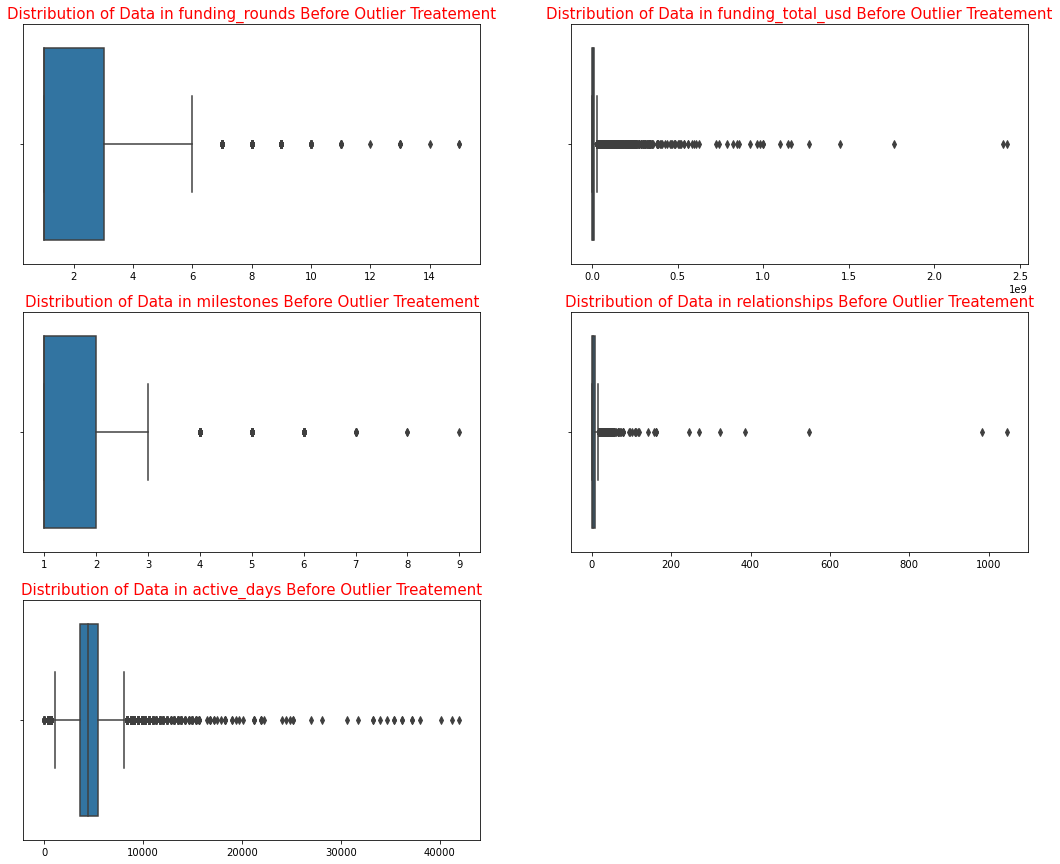

In [ ]:
num_col=['funding_rounds','funding_total_usd','milestones','relationships','active_days']

plt.figure(figsize=(18,15))
for i, col in enumerate(num_col):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=col, data=df)
    plt.xlabel("")
    plt.title(f"Distribution of Data in {col} Before Outlier Treatement", color='red',  fontsize=15);

#### All the 5 columns contains Outliers. But the exstreme outliers found in only three columns, "relationships", 'active_days and "funding_total_usd". Lets use IQR method to clip these outliers.

<h3 style="color:blue">1. Outlier Treatment in "funding_total_usd_column".</h3>

In [ ]:
q1 = df['funding_total_usd'].quantile(0.25)   # First quartile range
q3 = df['funding_total_usd'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of funding_total_usd = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[df['funding_total_usd']<upper_bound]

First quartile range = 720000.0
Second quartile range = 12800000.0
IQR of funding_total_usd = 12080000.0
Lower Limit = -17400000.0
Upper Limit = 30920000.0


<h3 style="color:blue">2. Outlier Treatment in "relationships" column.

In [ ]:
q1 = df['relationships'].quantile(0.25)   # First quartile range
q3 = df['relationships'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of relationships = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[df['relationships']< upper_bound]

First quartile range = 2.0
Second quartile range = 7.0
IQR of relationships = 5.0
Lower Limit = -5.5
Upper Limit = 14.5


<h3 style="color:blue">3. Outlier Treatment in "active_days" column.

In [ ]:
q1 = df['active_days'].quantile(0.25)   # First quartile range
q3 = df['active_days'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of active_days = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[(df['active_days']< upper_bound) & (df['active_days']> lower_bound)]

First quartile range = 3285.0
Second quartile range = 5110.0
IQR of active_days = 1825.0
Lower Limit = 547.5
Upper Limit = 7847.5


<h3 style="color:blue">4. Outlier Treatment in "funding_rounds" column.

In [ ]:
q1 = df['funding_rounds'].quantile(0.25)   # First quartile range
q3 = df['funding_rounds'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of funding_rounds = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[df['funding_rounds']< upper_bound]

First quartile range = 1.0
Second quartile range = 2.0
IQR of funding_rounds = 1.0
Lower Limit = -0.5
Upper Limit = 3.5


<h3 style="color:blue">5. Outlier Treatment in "milestones" column.

In [ ]:
q1 = df['milestones'].quantile(0.25)   # First quartile range
q3 = df['milestones'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of funding_total_usd = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[df['milestones']< upper_bound]

First quartile range = 1.0
Second quartile range = 2.0
IQR of funding_total_usd = 1.0
Lower Limit = -0.5
Upper Limit = 3.5


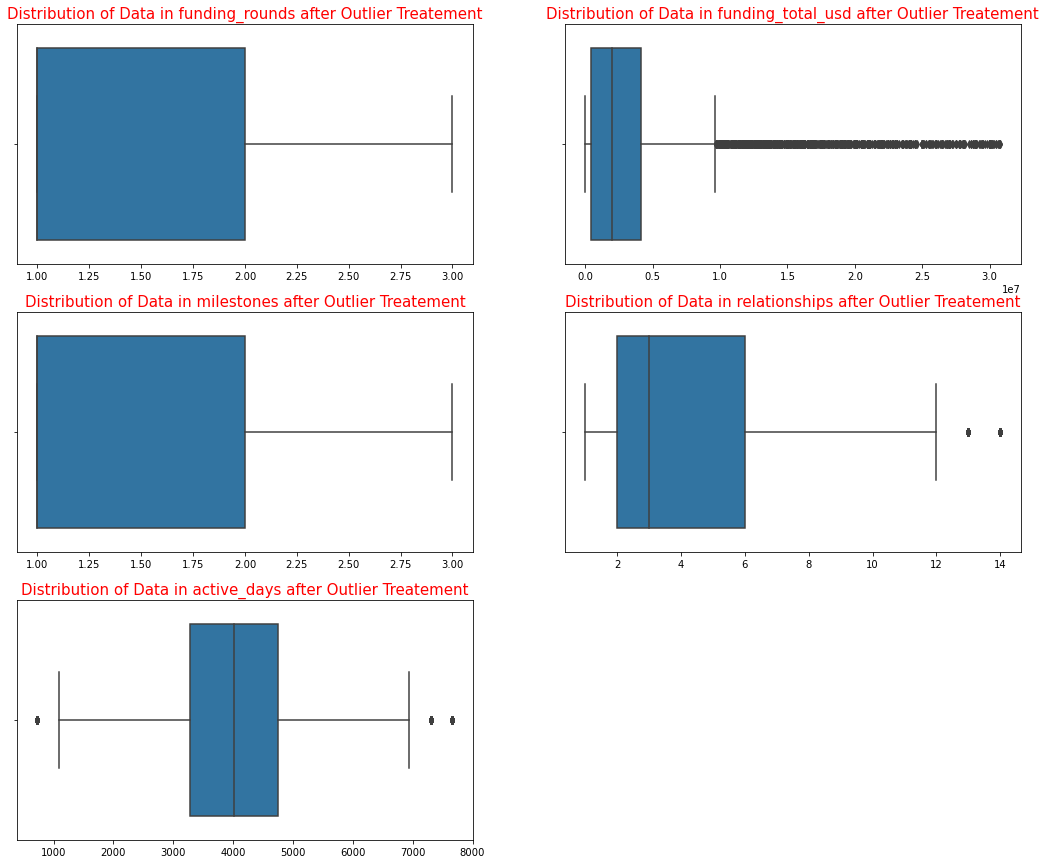

In [ ]:
plt.figure(figsize=(18,15))
for i, col in enumerate(num_col):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=col, data=df)
    plt.xlabel("")
    plt.title(f"Distribution of Data in {col} after Outlier Treatement", color='red',  fontsize=15);

### Check for duplicates and missing values and save this dataset for further analysis and model building.

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

category_code         0
status                0
founded_at            0
country_code          0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
lat                   0
lng                   0
active_days           0
dtype: int64

In [ ]:
df.to_csv('data/clean_data.csv', index=False)

In [ ]:
df.shape

(8713, 15)

<h3 style="color:blue;">Descriptive Statistics after data cleaning

In [ ]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
founded_at,8713.0,2009.19,3.02,1989.00,2008.00,2010.00,2011.00,2014.00
first_funding_at,8713.0,2010.74,2.16,1974.00,2010.00,2011.00,2012.00,2013.00
last_funding_at,8713.0,2011.34,1.96,1974.00,2011.00,2012.00,2013.00,2013.00
funding_rounds,8713.0,1.50,0.69,1.00,1.00,1.00,2.00,3.00
funding_total_usd,8713.0,4083567.40,5761437.71,291.00,400000.00,2000000.00,4100000.00,30800000.00
first_milestone_at,8713.0,2010.66,2.62,1976.00,2010.00,2011.00,2012.00,2014.00
last_milestone_at,8713.0,2011.20,2.45,1976.00,2011.00,2012.00,2013.00,2014.00
milestones,8713.0,1.47,0.65,1.00,1.00,1.00,2.00,3.00
relationships,8713.0,4.25,2.98,1.00,2.00,3.00,6.00,14.00
lat,8713.0,38.40,14.73,-42.88,36.71,39.89,45.50,70.92


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
category_code,8713,16,other,1688
status,8713,2,operating,8189
country_code,8713,10,USA,5471


<h2 style="color:red;">Observations After Cleaning the Data: 🕵️‍♀️🕵️‍♀️</h2>
<h4 style="color:coral; line-height:2">1. The average number of funding rounds is around 1.7(consider as 2), with a median (50th percentile) of 1. This suggests that a most of entities had only one funding round.<br>
    2. On average, these companies were founded in 2008, with a standard deviation of 5.15 years. The founding years range from a minimum of 1908 to a maximum of 2014..<br>
    3. Companies, on average, secured their first funding in 2010, with a standard deviation of 2.35 years. The earliest recorded first funding year is 1974, while the most recent is 2013.<br>
    4. The dataset shows an average last funding year of 2011, with a standard deviation of 2.09 years. The earliest recorded last funding year is 1974, and the latest is 2013.<br>
    6. On average, companies in our dataset underwent 1.70 funding rounds, with a standard deviation of 1.07. The number of funding rounds ranges from a minimum of 1 to a maximum of 15.<br>
    7. The average total funding for these companies is 5,028,844.56, with a notable standard deviation of 6,904,009.13. Funding amounts vary, starting from 291 and reaching as high as 33,600,000.<br>
    8. Companies, on average, achieved their first milestone in 2010, with a standard deviation of 2.89 years. The earliest recorded first milestone year is 1976, while the most recent is 2014.<br>
    9. The dataset shows an average last milestone year of 2011, with a standard deviation of 2.71 years. The earliest recorded last milestone year is 1976, and the latest is 2014.<br>
    10. On average, companies in our dataset accomplished 1.53 milestones, with a standard deviation of 0.74. The number of milestones ranges from a minimum of 1 to a maximum of 9.<br>
    11. Companies, on average, have 4.50 recorded relationships, with a standard deviation of 3.16. The number of relationships varies from a minimum of 1 to a maximum of 14.<br>
    12. Companies in our dataset have been active for an average of 4420 days, with a standard deviation of 2033.11. Active days range from 0 to 41245, with a median of 4015 days.</h4>